In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 多变量线性回归

## 读取文件

In [2]:
path = "exp1data2.txt"
data = pd.read_csv(path, names=["size", "bedroom", "price"])
data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 数据归一化

In [3]:
def normalizeFeature(data):
    return (data - data.mean()) / data.std()

In [4]:
data = normalizeFeature(data)

In [5]:
data.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 获取数据集

In [6]:
data.insert(0, "one", 1)
data.head()

,one,size,bedroom,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [7]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
X = np.matrix(X.values)
Y = np.matrix(Y.values).reshape(47, 1)

## 损失函数

In [8]:
def costFunc(X, theta, Y):
    inner = np.power(((X * theta) - Y), 2)
    return np.sum(inner) / (2 * len(X))

In [9]:
theta = np.zeros((3,1))

## 梯度下降

In [10]:
def gradientDecent(X, theta, Y, alpha, iters):
    costs = []
    for i in range(iters):
        theta = theta - (X.T  * (X * theta - Y)) * alpha / len(X)
        cost = costFunc(X, theta, Y)
        costs.append(cost)
    return theta, costs

## 不同$\alpha$的效果比较

In [11]:
alphas = [0.0003, 0.003, 0.03, 0.0001, 0.001, 0.01]
iters = 2000

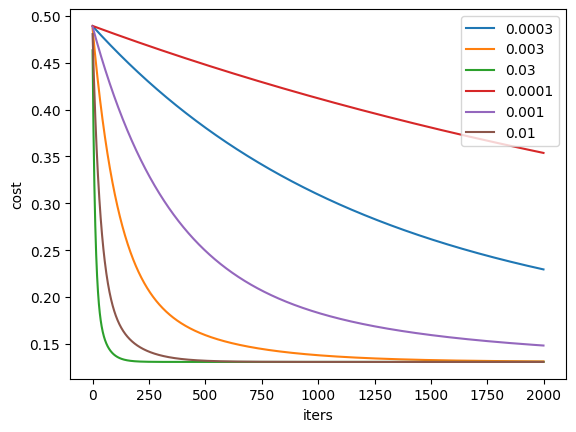

In [12]:
fig, ax = plt.subplots()

for alpha in alphas:
    _, costs = gradientDecent(X, theta, Y, alpha, iters)
    ax.plot(np.arange(iters), costs, label=alpha)
    ax.legend()
ax.set(xlabel="iters", ylabel="cost")
plt.show()